In [307]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy,os,glob
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

In [308]:
mesh=nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/mesh_files/mesh_mask_rm1Canada.nc')

In [309]:
mbathy=mesh.variables['mbathy'][0,700,210]
gdept=mesh.variables['gdept'][0,:mbathy,700,210]
gdepw=mesh.variables['gdepw'][0,:mbathy,700,210]
e3t=mesh.variables['e3t'][0,:mbathy,700,210]
e3w=mesh.variables['e3w'][0,:mbathy+1,700,210]

In [310]:
ice=nc.Dataset('/ocean/xiaoxiny/research/data/forcing/Ice/noaa_icemod_y1958m09.nc')
ice=ice.variables['ileadfra'][0,700,210]
print ice

xd=nc.Dataset('/ocean/xiaoxiny/research/data/init_files/newzero_ANHA_Th_diss.nc')
xd=xd.variables['Th_diss'][0,:mbathy,700,210]

xp=nc.Dataset('/ocean/xiaoxiny/research/data/init_files/newzero_ANHA_Th_part.nc')
xp=xp.variables['Th_part'][0,:mbathy,700,210]

0.797721


In [311]:
import pylab

I = np.zeros(gdept.shape) # Ice signal
S = np.zeros(gdept.shape)
Q = 0.0267     #dpm/m^3
k_de = 0.8     #desorption constants

In [312]:
# time info
dt = 1./365/24/3600*1080
t = 0.0
tmax = 1  #yr

# initialize the data 
xd_=np.copy(xd)
xp_=np.copy(xp)


anew=np.zeros(xd.shape)
bnew=np.zeros(xd.shape)
cnew=np.zeros(xd.shape)

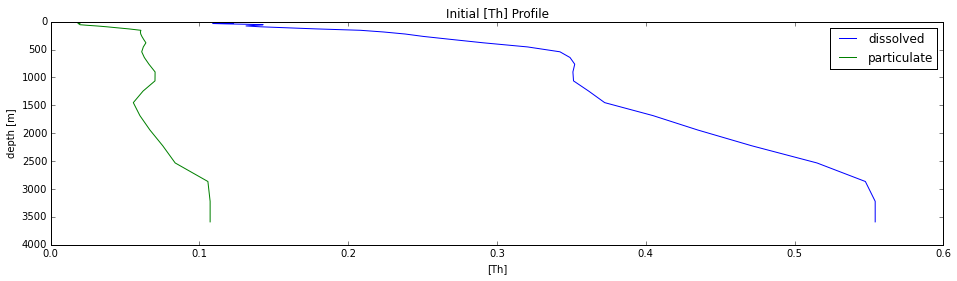

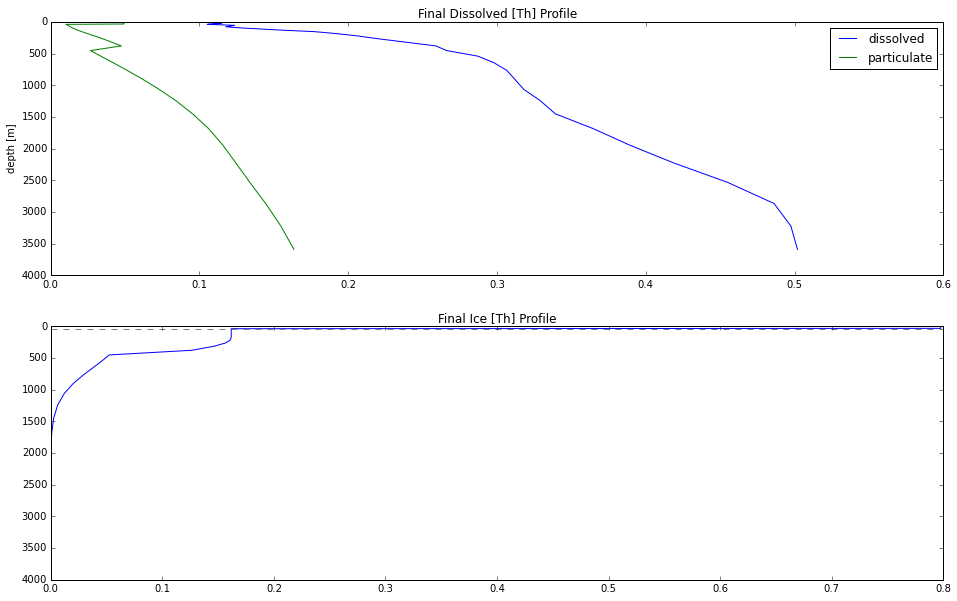

In [313]:
while (t < tmax):               # loop through all dt on [0, tmax]
    I[:16]=ice                   # ice/sinking rate/adsorption constants
    S[:30] = -689.3*I[:30]+1323*0.5   
    S[30:] = -689.3*I[30:]+1323       
    k_ad[:] = 0.23*I[:]+0.37
    
    i=0                         # the surface BC.
    anew[i] = xd_[i+1]           
    bnew[i] = xp_[i+1] 
    cnew[i] = I[i+1]        
    
    i += 1
    while (i <= mbathy-1):     # loop through all depths
        
        # forward difference
        anew[i] = xd_[i] + (Q - k_ad[i]*xd_[i] + k_de*xp_[i]) * dt

        bnew[i] = xp_[i] + ((S[i-1]*xp_[i-1]-S[i]*xp_[i])/e3w[i+1] 
                  + k_ad[i]*xd_[i] - k_de*xp_[i]) * dt
        
        cnew[i] = I[i] + (S[i-1]*I[i-1]-S[i]*I[i])/e3w[i+1] * dt
        
        i += 1

    # store the updated solution
    xd_[:] = anew[:]
    xp_[:] = bnew[:]
    I[:]   = cnew[:]

    t += dt


# initial dissolved and particulate
pylab.figure(1, figsize = (16, 4))  
pylab.plot(xd, gdept)
pylab.plot(xp, gdept)

# final dissolved and particulate
pylab.figure(2, figsize = (16, 10))
pylab.subplot(211)
pylab.plot(xd_, gdept)
pylab.plot(xp_, gdept)
pylab.subplot(212)
pylab.plot(I, gdept)
pylab.axhline(y=gdept[16],color='grey',ls='--')
    

# label and scale plots
pylab.figure(2, figsize = (16, 8))
pylab.subplot(211)
pylab.ylabel('depth [m]')
pylab.title('Final Dissolved [Th] Profile')
pylab.legend(['dissolved', 'particulate'])
pylab.gca().invert_yaxis()
pylab.xlim([0,0.6])
pylab.subplot(212)
pylab.title('Final Ice [Th] Profile')
pylab.gca().invert_yaxis()


pylab.figure(1, figsize = (16, 4))
pylab.gca().invert_yaxis()
pylab.title('Initial [Th] Profile')
pylab.legend(['dissolved', 'particulate'])
pylab.ylabel('depth [m]')
pylab.xlabel('[Th]')

In [314]:
I

array([  7.97720790e-01,   7.97720790e-01,   7.97720790e-01,
         7.97720790e-01,   7.97720790e-01,   7.97720790e-01,
         7.97720790e-01,   7.97720790e-01,   7.97720790e-01,
         7.97720790e-01,   7.97720790e-01,   7.97720790e-01,
         7.97720790e-01,   7.97720790e-01,   7.97720790e-01,
         7.97720790e-01,   1.61948440e-01,   1.61948440e-01,
         1.61948440e-01,   1.61948440e-01,   1.61948440e-01,
         1.61948440e-01,   1.61948423e-01,   1.61947731e-01,
         1.61933343e-01,   1.61773164e-01,   1.60744523e-01,
         1.56677623e-01,   1.46102801e-01,   1.26671035e-01,
         5.24821623e-02,   4.66429489e-02,   3.89561994e-02,
         2.98425672e-02,   2.04617324e-02,   1.22963807e-02,
         6.37909285e-03,   2.83286940e-03,   1.07473359e-03,
         3.49441388e-04,   9.80463116e-05,   2.39550429e-05,
         5.14795270e-06,   1.00038661e-06,   1.81372928e-07])

In [315]:
xp_

array([ 0.0485114 ,  0.04851205,  0.04851274,  0.04851329,  0.04851616,
        0.04851929,  0.04853037,  0.04855124,  0.04858436,  0.04863342,
        0.04870282,  0.0488136 ,  0.0489606 ,  0.0491732 ,  0.04934579,
        0.0494032 ,  0.01042351,  0.01094667,  0.01163152,  0.0124214 ,
        0.01331607,  0.0144626 ,  0.01601044,  0.018116  ,  0.02107321,
        0.02484441,  0.02949045,  0.03484497,  0.04081101,  0.04760388,
        0.02685445,  0.03377737,  0.04192993,  0.05130659,  0.06168559,
        0.07278769,  0.08435518,  0.09551263,  0.10623085,  0.11573317,
        0.12452722,  0.13398373,  0.14459018,  0.15479121,  0.16358986], dtype=float32)

In [316]:
S

array([  111.63105952,   111.63105952,   111.63105952,   111.63105952,
         111.63105952,   111.63105952,   111.63105952,   111.63105952,
         111.63105952,   111.63105952,   111.63105952,   111.63105952,
         111.63105952,   111.63105952,   111.63105952,   111.63105952,
         549.86894048,   549.86894048,   549.86894048,   549.86894048,
         549.86894048,   549.8689406 ,   549.86895184,   549.86942931,
         549.8793516 ,   549.98980349,   550.69904518,   553.5029315 ,
         560.79316212,   574.1886045 ,  1286.82545471,  1290.85070442,
        1296.14940819,  1302.43149378,  1308.89751054,  1314.52547598,
        1318.60377562,  1321.04777811,  1322.2593988 ,  1322.75920995,
        1322.93244213,  1322.98349475,  1322.99645317,  1322.99931078,
        1322.99987505])